<a href="https://colab.research.google.com/github/vzorspb/DE_Sprint/blob/main/Task_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание к модулю 1.6

In [83]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/DataEngineer.csv')
for index, row in df.iterrows():
    df.at[index,'Company Name']= row['Company Name'].split('\r\n')[0]
    if row['Founded']==-1:
       df.loc[index,'Founded']=np.nan
    if row['Type of ownership']=='-1' or row['Type of ownership']=='Unknown':
       df.loc[index,'Type of ownership']=np.nan
    if row['Industry']=='-1' or row['Industry']=='Unknown':
       df.loc[index,'Industry']=np.nan
    salary=row['Salary Estimate'].split(' ')[0].replace('(Employer','').replace('K','000').replace('$','').split('-')
    df.loc[index,'Salary Estimate']=(int(salary[0])+int(salary[1]))/2
agg ={'Job Title':['count']}
job_title_list=df.groupby('Job Title').agg(agg).reset_index().sort_values([('Job Title','count')],ascending=False)
agg ={'Company Name':['count']}
company_list=df.groupby('Company Name').agg(agg).reset_index().sort_values([('Company Name','count')],ascending=False)
agg ={'Location':['count']}
location_list=df.groupby('Location').agg(agg).reset_index().sort_values([('Location','count')],ascending=False)
agg ={'Type of ownership':['count']}
owner_list=df.groupby('Type of ownership').agg(agg).reset_index().sort_values([('Type of ownership','count')],ascending=False)
agg ={'Industry':['count'],'Salary Estimate':['median']}
#agg ={'Industry':['count']}
industry_list=df.groupby('Industry').agg(agg).reset_index().sort_values([('Industry','count')],ascending=False)
agg ={'Salary Estimate':['count']}
#salary_list=df.groupby('Salary Estimate').agg(agg).reset_index().sort_values([('Salary Estimate','count')],ascending=False)
#dataset_size=len(df)

df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,115000.0,Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009.0,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,115000.0,"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998.0,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,115000.0,Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003.0,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,115000.0,About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,115000.0,Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914.0,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,102000.0,The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
2524,Electrical Engineer,102000.0,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993.0,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1
2525,Sr. Big Data Engineer,102000.0,Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,NaN,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
2526,Senior Big Data / ETL Engineer,102000.0,"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,NaN,Company - Public,NaN,-1,Unknown / Non-Applicable,-1,-1


Построить график компаний с самым большим кол-вом вакансий

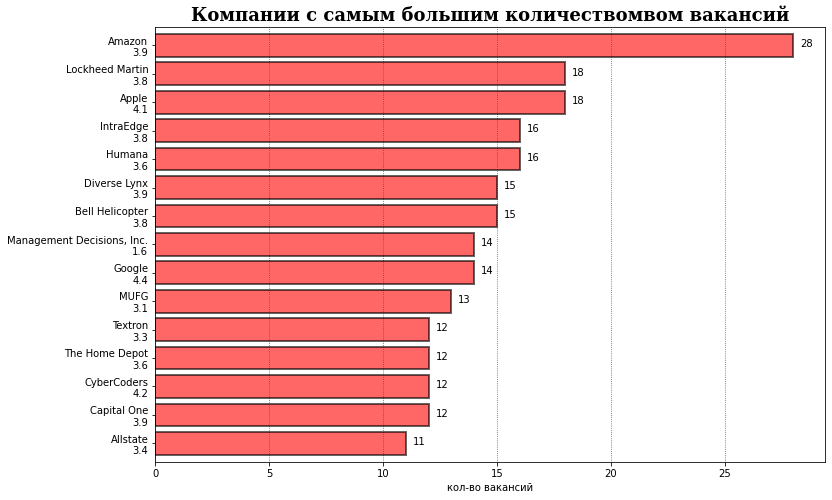

In [3]:
import matplotlib.pyplot as plt
list=company_list.head(15).sort_values(('Company Name','count'))

ax = list.plot.barh(x=('Company Name',''),y=('Company Name','count'),color='red',figsize=(12,8),edgecolor="k", linewidth=2, alpha=0.6, width=0.8)
ax.legend().set_visible(False)
x_offset = 0.3
y_offset = -0.45
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.x1 + b.x0)        
    ax.annotate(val, (( b.x1) + x_offset, b.y1 + y_offset))

plt.title('Компании с самым большим количествомвом вакансий',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.ylabel('')
ax.set_axisbelow(True)
ax.grid(axis='x')
ax.xaxis.grid(color='r',linestyle='dotted',)
plt.xlabel('кол-во вакансий')
plt.show()

Построить график самых популярный названий в вакансиях

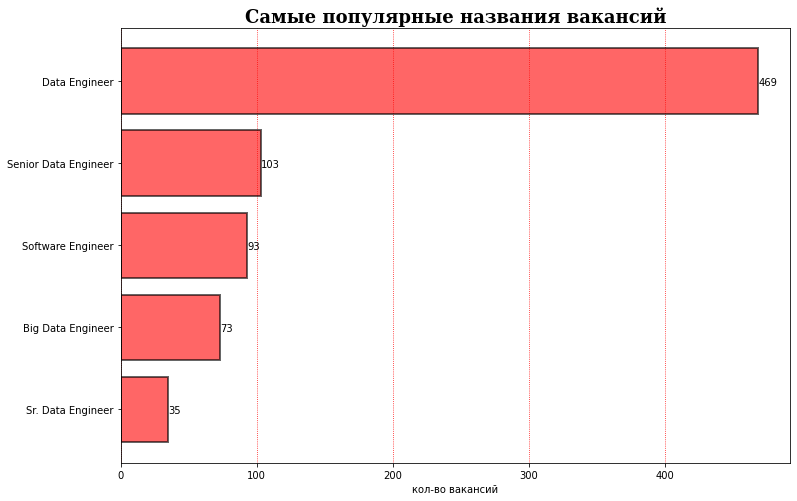

In [9]:
import matplotlib.pyplot as plt
list=job_title_list.head(5).sort_values(('Job Title','count'))
ax = list.plot.barh(x=('Job Title',''),y=('Job Title','count'),color='red',figsize=(12,8),edgecolor="k", linewidth=2, alpha=0.6, width=0.8)
ax.legend().set_visible(False)
x_offset = 0.3
y_offset = -0.45
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.x1 + b.x0)        
    ax.annotate(val, (( b.x1) + x_offset, b.y1 + y_offset))

plt.title('Самые популярные названия вакансий',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.ylabel('')
ax.set_axisbelow(True)
ax.grid(axis='x')
ax.xaxis.grid(color='r',linestyle='dotted',)
plt.xlabel('кол-во вакансий')
plt.show()

Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

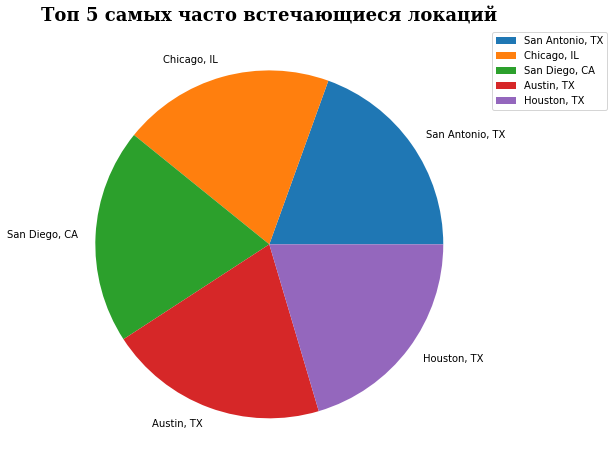

In [17]:
import matplotlib.pyplot as plt

list=location_list.head(5).sort_values(('Location','count'))
list.set_index(('Location',''), inplace=True)

ax = list.plot.pie(y=('Location','count'),figsize=(14,8))
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.title('Топ 5 самых часто встечающиеся локаций',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.show()

Построить график популярности по колонке Type of ownership, относительно численности вакансий

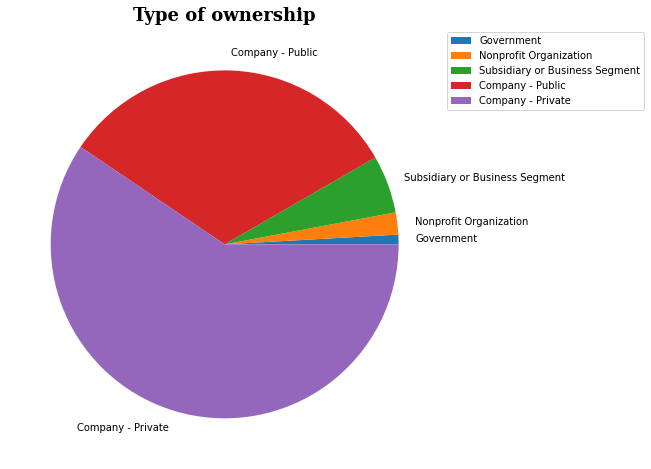

In [39]:
import matplotlib.pyplot as plt
list=owner_list.head(5).sort_values(('Type of ownership','count'))
list.set_index(('Type of ownership',''), inplace=True)

ax = list.plot.pie(y=('Type of ownership','count'),figsize=(18,8))
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.title('Type of ownership',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.show()

Построить график популярности по секторам работы

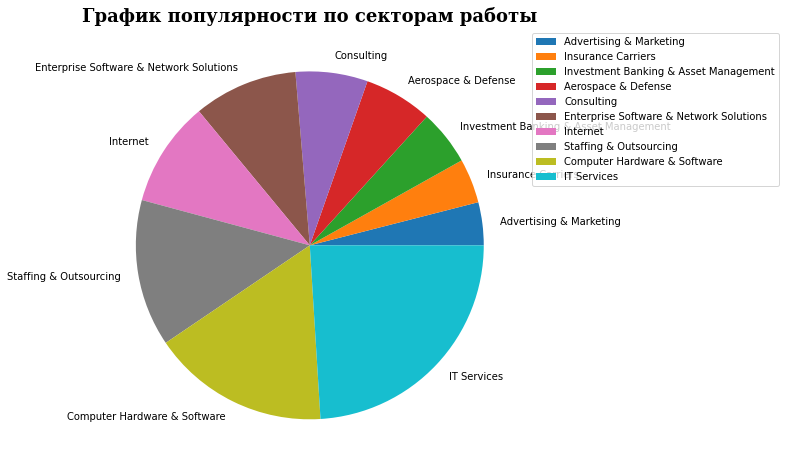

In [84]:
import matplotlib.pyplot as plt
list=industry_list.head(10).sort_values(('Industry','count'))
list.set_index(('Industry',''), inplace=True)
ax = list.plot.pie(y=('Industry','count'),figsize=(18,8))
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.title('График популярности по секторам работы',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.show()

Построить график используя сектора работы и средний уровень зарплат в них

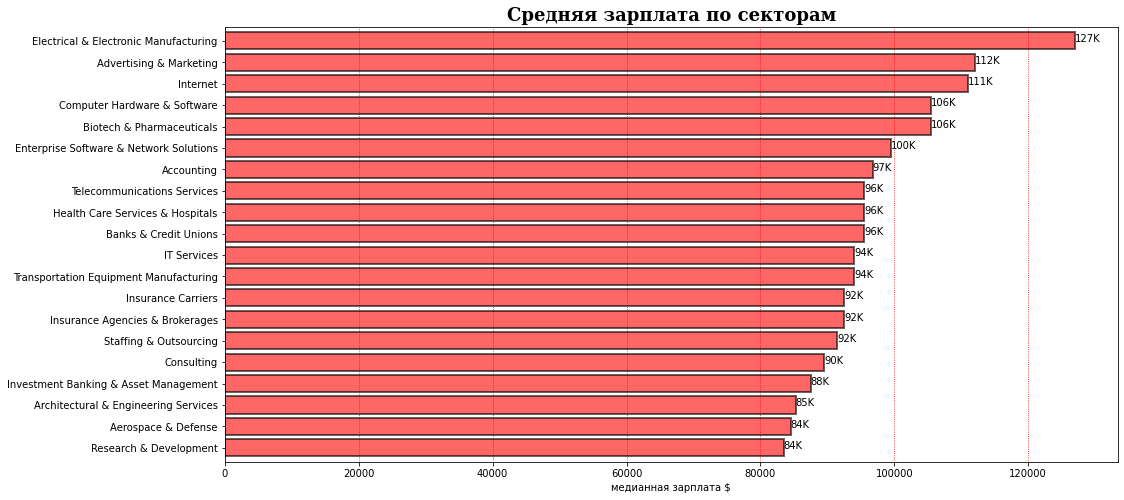

In [96]:
import matplotlib.pyplot as plt
list=industry_list.head(20).sort_values(('Salary Estimate','median'))
ax = list.plot.barh(x=('Industry',''),y=('Salary Estimate','median'),color='red',figsize=(16,8),edgecolor="k", linewidth=2, alpha=0.6, width=0.8)
ax.legend().set_visible(False)
x_offset = 0.3
y_offset = -0.45
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format((b.x1 + b.x0)/1000)+'K'        
    ax.annotate(val, (( b.x1) + x_offset, b.y1 + y_offset))

plt.title('Средняя зарплата по секторам',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.ylabel('')
ax.set_axisbelow(True)
ax.grid(axis='x')
ax.xaxis.grid(color='r',linestyle='dotted',)
plt.xlabel('медианная зарплата $')
plt.show()